In [204]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [8]:
from src.utils.folders_tb import readcsv

In [87]:
adni = pd.read_csv("/Users/ariadnapuigventos/Documents/CURSOS/BRIDGE/DS_Ejercicios_Python/BootCamp_TheBridge/Alzheimers_Disease/Data/MCI_AD_CN_Final.csv", sep=",")
adni.head()

Subject ID   Phase Sex  Weight Research Group  APOE A2               Visit  \
0  002_S_0729  ADNI 2   F    75.3            MCI        4  ADNI2 Year 2 Visit   
1  002_S_1070  ADNI 1   M    88.4            MCI        3   ADNI1/GO Month 24   
2  002_S_1070  ADNI 1   M    88.4            MCI        3   ADNI1/GO Month 24   
3  003_S_4892  ADNI 2   F    81.6             AD        4  ADNI2 Year 1 Visit   
4  003_S_4892  ADNI 2   F    81.6             AD        4  ADNI2 Year 1 Visit   

   Study Date   Age  MMSE Total Score  GDSCALE Total Score  Global CDR  \
0   8/16/2013  72.3              24.0                  1.0         1.0   
1  12/11/2008  75.8              19.0                  1.0         1.0   
2  12/11/2008  75.8              19.0                  1.0         1.0   
3   9/19/2013  76.3              26.0                  4.0         1.0   
4   9/19/2013  76.3              26.0                  4.0         1.0   

         Description      Type                      Imaging Protocol Structure  
0  3 Plane Localizer  Original  Acquisition Plane=AXIAL;Weighting=T1     Brain  
1  3-plane localizer  Original  Acquisition Plane=AXIAL;Weighting=T1     Brain  
2             SURVEY  Original  Acquisition Plane=AXIAL;Weighting=T1     Brain  
3   Calibration Scan  Original  Acquisition Plane=AXIAL;Weighting=T1     Brain  
4  3 Plane Localizer  Original  Acquisition Plane=AXIAL;Weighting=T1     Brain

In [88]:
adni.describe()

Weight     APOE A2         Age  MMSE Total Score  \
count  323.000000  323.000000  323.000000        323.000000   
mean    73.698142    3.653251   77.928793         20.095975   
std     13.187211    0.476674    7.716547          4.828752   
min     36.700000    3.000000   56.200000          0.000000   
25%     65.450000    3.000000   72.350000         17.500000   
50%     73.000000    4.000000   78.800000         21.000000   
75%     81.050000    4.000000   83.850000         24.000000   
max    127.500000    4.000000   92.400000         30.000000   

       GDSCALE Total Score  Global CDR  
count           323.000000  323.000000  
mean              2.386997    1.204334  
std               1.911574    0.440616  
min               1.000000    1.000000  
25%               1.000000    1.000000  
50%               2.000000    1.000000  
75%               3.000000    1.000000  
max               9.000000    3.000000

In [90]:
adni.shape

(323, 16)

### **PRE-PROCESSING**

In [89]:
lista = []
n=1
ul_paciente=None
for paciente in adni["Subject ID"]:
    if ul_paciente != paciente:
        lista.append(paciente)
        n=n+1
    else:
        n=1
print(lista)

['002_S_0729', '002_S_1070', '002_S_1070', '003_S_4892', '003_S_4892', '005_S_0221', '005_S_0222', '005_S_0222', '005_S_0572', '005_S_0572', '005_S_0814', '005_S_0814', '005_S_1341', '005_S_1341', '005_S_4707', '005_S_4707', '006_S_0547', '007_S_0128', '007_S_0249', '007_S_0316', '007_S_1339', '007_S_1339', '009_S_1030', '009_S_1030', '009_S_1030', '009_S_1030', '009_S_5027', '009_S_5027', '009_S_5037', '009_S_5037', '011_S_0003', '011_S_0010', '011_S_0053', '011_S_0053', '011_S_0861', '011_S_1282', '012_S_0689', '012_S_0689', '013_S_0240', '013_S_5071', '016_S_0991', '016_S_0991', '016_S_1117', '016_S_1121', '016_S_1326', '016_S_1326', '016_S_1326', '016_S_4009', '016_S_4009', '016_S_4009', '016_S_4009', '016_S_4591', '016_S_4591', '016_S_4591', '016_S_4591', '016_S_4887', '016_S_4887', '016_S_5032', '016_S_5032', '016_S_5032', '018_S_0142', '018_S_0633', '018_S_0633', '018_S_0682', '018_S_0682', '019_S_4549', '019_S_5019', '021_S_0332', '021_S_0626', '021_S_0753', '021_S_0753', '021_

In [97]:
adni["Visit"].value_counts()

ADNI1/GO Month 24     105
ADNI2 Year 1 Visit     92
ADNI1/GO Month 12      74
ADNI2 Year 2 Visit     31
ADNI2 Year 3 Visit     12
ADNI2 Year 4 Visit      9
Name: Visit, dtype: int64

In [104]:
#I have wanted to give to the dataframe the importance of visits. It's high number when the disease is more serious.
adni['Visits_numbering'] = adni["Visit"].map({"ADNI1/GO Month 12":4, "ADNI1/GO Month 24":6,'ADNI2 Year 1 Visit':6.5,'ADNI2 Year 2 Visit':7,'ADNI2 Year 3 Visit':8,'ADNI2 Year 4 Visit':9})
adni.head(1)

Subject ID   Phase Sex  Weight Research Group  APOE A2               Visit  \
0  002_S_0729  ADNI 2   F    75.3            MCI        4  ADNI2 Year 2 Visit   

  Study Date   Age  MMSE Total Score  GDSCALE Total Score  Global CDR  \
0  8/16/2013  72.3              24.0                  1.0         1.0   

         Description      Type                      Imaging Protocol  \
0  3 Plane Localizer  Original  Acquisition Plane=AXIAL;Weighting=T1   

  Structure  Visits_numbering  
0     Brain               7.0

In [108]:
#Quería añadir una columna con las visitas que tuviera el paciente por cada tipo de prueba que tuviera
tests = []
n=1
for paciente in adni["Structure"]:
    if paciente == "Brain":
        tests.append(1)
print(tests)

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


In [110]:
adni["Visits"] = tests
adni.head()

Subject ID   Phase Sex  Weight Research Group  APOE A2               Visit  \
0  002_S_0729  ADNI 2   F    75.3            MCI        4  ADNI2 Year 2 Visit   
1  002_S_1070  ADNI 1   M    88.4            MCI        3   ADNI1/GO Month 24   
2  002_S_1070  ADNI 1   M    88.4            MCI        3   ADNI1/GO Month 24   
3  003_S_4892  ADNI 2   F    81.6             AD        4  ADNI2 Year 1 Visit   
4  003_S_4892  ADNI 2   F    81.6             AD        4  ADNI2 Year 1 Visit   

   Study Date   Age  MMSE Total Score  GDSCALE Total Score  Global CDR  \
0   8/16/2013  72.3              24.0                  1.0         1.0   
1  12/11/2008  75.8              19.0                  1.0         1.0   
2  12/11/2008  75.8              19.0                  1.0         1.0   
3   9/19/2013  76.3              26.0                  4.0         1.0   
4   9/19/2013  76.3              26.0                  4.0         1.0   

         Description      Type                      Imaging Protocol  \
0  3 Plane Localizer  Original  Acquisition Plane=AXIAL;Weighting=T1   
1  3-plane localizer  Original  Acquisition Plane=AXIAL;Weighting=T1   
2             SURVEY  Original  Acquisition Plane=AXIAL;Weighting=T1   
3   Calibration Scan  Original  Acquisition Plane=AXIAL;Weighting=T1   
4  3 Plane Localizer  Original  Acquisition Plane=AXIAL;Weighting=T1   

  Structure  Visits_numbering  Visits  
0     Brain               7.0       1  
1     Brain               6.0       1  
2     Brain               6.0       1  
3     Brain               6.5       1  
4     Brain               6.5       1

In [118]:
#Eliminate some columns are not necessary to study
adni = adni.drop(["Type", "Imaging Protocol", "Structure"], axis=1)
adni.head()

Subject ID   Phase Sex  Weight Research Group  APOE A2               Visit  \
0  002_S_0729  ADNI 2   F    75.3            MCI        4  ADNI2 Year 2 Visit   
1  002_S_1070  ADNI 1   M    88.4            MCI        3   ADNI1/GO Month 24   
2  002_S_1070  ADNI 1   M    88.4            MCI        3   ADNI1/GO Month 24   
3  003_S_4892  ADNI 2   F    81.6             AD        4  ADNI2 Year 1 Visit   
4  003_S_4892  ADNI 2   F    81.6             AD        4  ADNI2 Year 1 Visit   

   Study Date   Age  MMSE Total Score  GDSCALE Total Score  Global CDR  \
0   8/16/2013  72.3              24.0                  1.0         1.0   
1  12/11/2008  75.8              19.0                  1.0         1.0   
2  12/11/2008  75.8              19.0                  1.0         1.0   
3   9/19/2013  76.3              26.0                  4.0         1.0   
4   9/19/2013  76.3              26.0                  4.0         1.0   

         Description  Visits_numbering  Visits  
0  3 Plane Localizer               7.0       1  
1  3-plane localizer               6.0       1  
2             SURVEY               6.0       1  
3   Calibration Scan               6.5       1  
4  3 Plane Localizer               6.5       1

In [128]:
#I want to drop only Research Group CN because only we have 15 registers and I want to normalize the dataframe
adni = adni.drop(adni[adni["Research Group"] == "CN"].index)
adni.head()

Subject ID   Phase Sex  Weight Research Group  APOE A2               Visit  \
0  002_S_0729  ADNI 2   F    75.3            MCI        4  ADNI2 Year 2 Visit   
1  002_S_1070  ADNI 1   M    88.4            MCI        3   ADNI1/GO Month 24   
2  002_S_1070  ADNI 1   M    88.4            MCI        3   ADNI1/GO Month 24   
3  003_S_4892  ADNI 2   F    81.6             AD        4  ADNI2 Year 1 Visit   
4  003_S_4892  ADNI 2   F    81.6             AD        4  ADNI2 Year 1 Visit   

   Study Date   Age  MMSE Total Score  GDSCALE Total Score  Global CDR  \
0   8/16/2013  72.3              24.0                  1.0         1.0   
1  12/11/2008  75.8              19.0                  1.0         1.0   
2  12/11/2008  75.8              19.0                  1.0         1.0   
3   9/19/2013  76.3              26.0                  4.0         1.0   
4   9/19/2013  76.3              26.0                  4.0         1.0   

         Description  Visits_numbering  Visits  
0  3 Plane Localizer               7.0       1  
1  3-plane localizer               6.0       1  
2             SURVEY               6.0       1  
3   Calibration Scan               6.5       1  
4  3 Plane Localizer               6.5       1

In [129]:
#Now, it isn't showing the CN group
adni["Research Group"].value_counts()

AD     197
MCI    111
Name: Research Group, dtype: int64

In [144]:
#To encode Research Group because is more serious AD Group than MCI Group. The system understands 2 is double and higher than 1
adni['Research_Group_encode'] = adni["Research Group"].map({"AD":2, "MCI":1})
adni = adni.drop(["Group"], axis=1)
adni.head(1)

Subject ID   Phase Sex  Weight Research Group  APOE A2               Visit  \
0  002_S_0729  ADNI 2   F    75.3            MCI        4  ADNI2 Year 2 Visit   

  Study Date   Age  MMSE Total Score  GDSCALE Total Score  Global CDR  \
0  8/16/2013  72.3              24.0                  1.0         1.0   

         Description  Visits_numbering  Visits  Research_Group_encode  
0  3 Plane Localizer               7.0       1                      1

In [168]:
#I want to encode this column because it is influence for the progress then I include them in the train
adni['gender'] = adni['Sex'].apply(lambda x: 0 if x == "F" else 1)
adni['gender']

0      0
1      1
2      1
3      0
4      0
      ..
318    0
319    0
320    0
321    0
322    1
Name: gender, Length: 308, dtype: int64

In [170]:
#with gender added
adni.head()

Subject ID   Phase Sex  Weight Research Group  APOE A2               Visit  \
0  002_S_0729  ADNI 2   F    75.3            MCI        4  ADNI2 Year 2 Visit   
1  002_S_1070  ADNI 1   M    88.4            MCI        3   ADNI1/GO Month 24   
2  002_S_1070  ADNI 1   M    88.4            MCI        3   ADNI1/GO Month 24   
3  003_S_4892  ADNI 2   F    81.6             AD        4  ADNI2 Year 1 Visit   
4  003_S_4892  ADNI 2   F    81.6             AD        4  ADNI2 Year 1 Visit   

   Study Date   Age  MMSE Total Score  GDSCALE Total Score  Global CDR  \
0   8/16/2013  72.3              24.0                  1.0         1.0   
1  12/11/2008  75.8              19.0                  1.0         1.0   
2  12/11/2008  75.8              19.0                  1.0         1.0   
3   9/19/2013  76.3              26.0                  4.0         1.0   
4   9/19/2013  76.3              26.0                  4.0         1.0   

         Description  Visits_numbering  Visits  Research_Group_encode  gender  
0  3 Plane Localizer               7.0       1                      1       0  
1  3-plane localizer               6.0       1                      1       1  
2             SURVEY               6.0       1                      1       1  
3   Calibration Scan               6.5       1                      2       0  
4  3 Plane Localizer               6.5       1                      2       0

In [91]:
adni.isnull().sum()

Subject ID             0
Phase                  0
Sex                    0
Weight                 0
Research Group         0
APOE A2                0
Visit                  0
Study Date             0
Age                    0
MMSE Total Score       0
GDSCALE Total Score    0
Global CDR             0
Description            0
Type                   0
Imaging Protocol       0
Structure              0
dtype: int64

<AxesSubplot:>

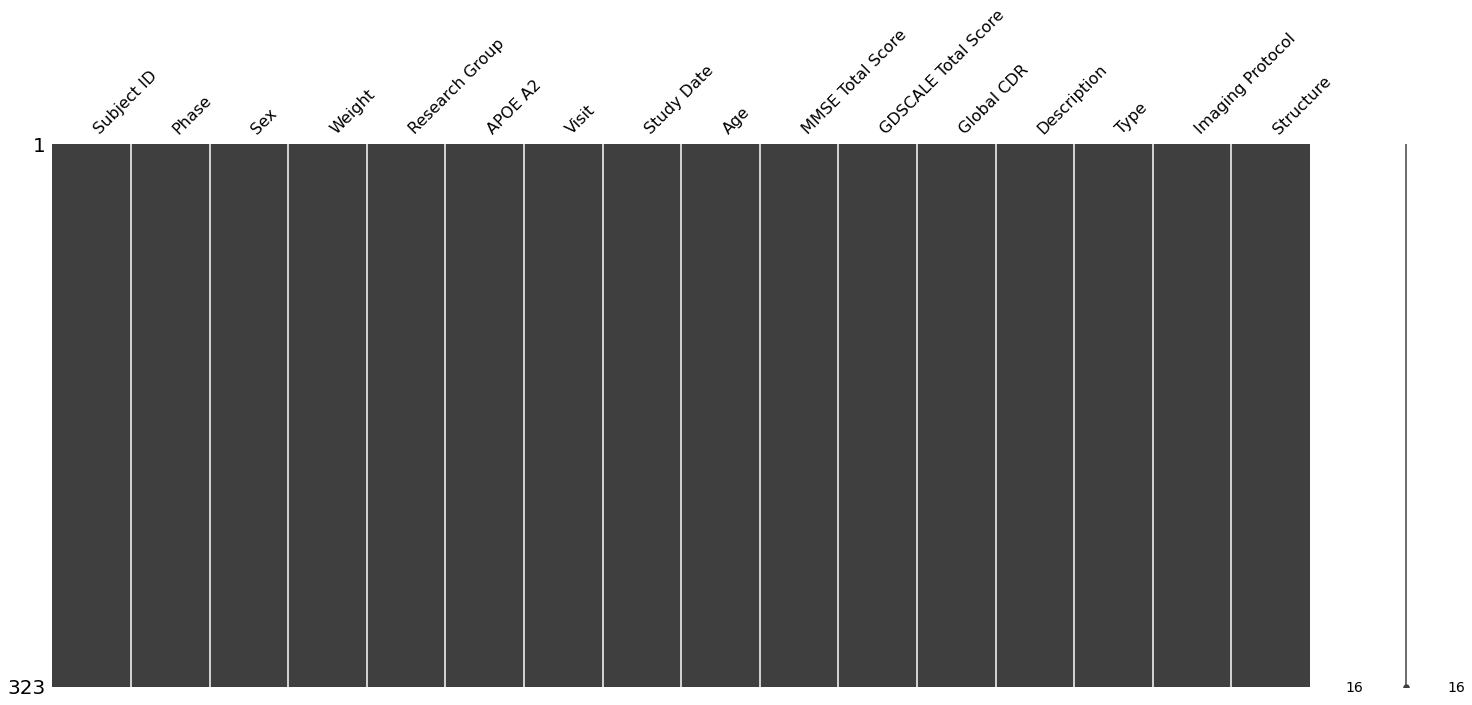

In [92]:
import missingno as msno
msno.matrix(adni)

In [132]:
adni["Phase"].value_counts()

ADNI 1    179
ADNI 2    129
Name: Phase, dtype: int64

In [133]:
adni["MMSE Total Score"].value_counts()

22.0    45
24.0    33
25.0    25
20.0    24
21.0    21
23.0    21
18.0    20
19.0    18
17.0    15
16.0    12
15.0    11
14.0    10
28.0     9
12.0     9
26.0     7
11.0     5
10.0     5
13.0     5
27.0     4
5.0      3
6.0      2
8.0      1
30.0     1
7.0      1
0.0      1
Name: MMSE Total Score, dtype: int64

In [134]:
adni["Global CDR"].value_counts()

1.0    249
2.0     54
3.0      5
Name: Global CDR, dtype: int64

In [135]:
adni["Sex"].value_counts()

M    189
F    119
Name: Sex, dtype: int64

In [136]:
MMSE_propo = (adni["MMSE Total Score"].value_counts() / adni["MMSE Total Score"].value_counts().sum() * 100)
MMSE_propo

22.0    14.610390
24.0    10.714286
25.0     8.116883
20.0     7.792208
21.0     6.818182
23.0     6.818182
18.0     6.493506
19.0     5.844156
17.0     4.870130
16.0     3.896104
15.0     3.571429
14.0     3.246753
28.0     2.922078
12.0     2.922078
26.0     2.272727
11.0     1.623377
10.0     1.623377
13.0     1.623377
27.0     1.298701
5.0      0.974026
6.0      0.649351
8.0      0.324675
30.0     0.324675
7.0      0.324675
0.0      0.324675
Name: MMSE Total Score, dtype: float64

In [137]:
adni["GDSCALE Total Score"].value_counts()

1.0    136
2.0     74
3.0     39
4.0     21
7.0     11
5.0     11
9.0      9
6.0      6
8.0      1
Name: GDSCALE Total Score, dtype: int64

In [139]:
adni["Visits_numbering"].value_counts()

6.0    105
6.5     91
4.0     74
7.0     22
8.0      9
9.0      7
Name: Visits_numbering, dtype: int64

In [111]:
adni.groupby("Subject ID").agg({"Weight": [min, max], "Age": [min, max], "MMSE Total Score": [min, max], "GDSCALE Total Score": [max], "Global CDR": [max], "Visits": [sum], "Visits_numbering": [min, max]})

Weight          Age       MMSE Total Score        \
              min    max   min   max              min   max   
Subject ID                                                    
002_S_0729   75.3   75.3  72.3  72.3             24.0  24.0   
002_S_1070   88.4   88.4  75.8  75.8             19.0  19.0   
003_S_4892   81.6   81.6  76.3  76.3             26.0  26.0   
005_S_0221  110.7  110.7  69.7  69.7             15.0  15.0   
005_S_0222   73.0   74.4  87.1  88.1             23.0  26.0   
...           ...    ...   ...   ...              ...   ...   
141_S_0915   57.6   57.6  86.8  86.8             18.0  18.0   
141_S_0982   88.9   88.9  81.4  81.4             24.0  24.0   
141_S_1004   78.9   78.9  81.1  81.1             17.0  17.0   
141_S_1137   56.7   56.7  82.8  82.8             17.0  17.0   
941_S_1311   60.3   60.3  71.3  71.3             27.0  27.0   

           GDSCALE Total Score Global CDR Visits Visits_numbering       
                           max        max    sum              min  max  
Subject ID                                                              
002_S_0729                 1.0        1.0      1              7.0  7.0  
002_S_1070                 1.0        1.0      2              6.0  6.0  
003_S_4892                 4.0        1.0      2              6.5  6.5  
005_S_0221                 1.0        2.0      1              6.0  6.0  
005_S_0222                 2.0        1.0      2              4.0  6.0  
...                        ...        ...    ...              ...  ...  
141_S_0915                 1.0        3.0      2              6.5  6.5  
141_S_0982                 1.0        1.0      1              4.0  4.0  
141_S_1004                 2.0        2.0      1              7.0  7.0  
141_S_1137                 2.0        2.0      1              4.0  4.0  
941_S_1311                 1.0        1.0      1              6.0  6.0  

[187 rows x 11 columns]

<AxesSubplot:>

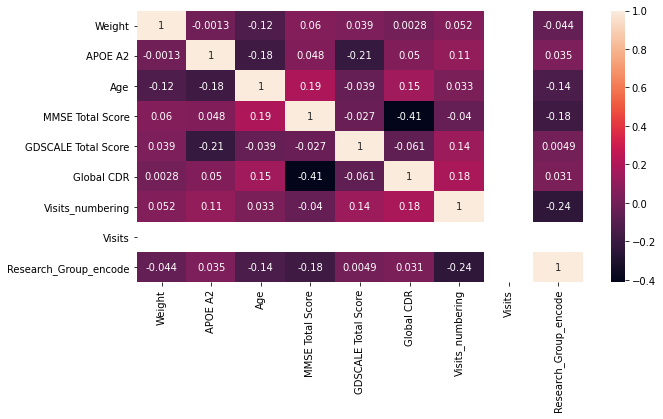

In [145]:
#Age is directly positive correlation with MMSE in 0.19 and CDR in 0.15
fig, ax = plt.subplots(figsize=(10,5)) 
sns.heatmap(adni.corr(), annot=True)

In [141]:
#Althought, there are more male than female. we can see that both catch maxium CDR to 3 points but in MMSE is the male became an higher index with 30 points than female with 28 points. AD is detected earlier with 56  and 57 years old in female and male, respecticly. Furthermore, AD men is keep going in advanced age until 92 and women stops until 89 years old. 
adni.groupby("Sex").agg({"Weight": [min, max], "Age": [min, max], "MMSE Total Score": [min, max], "GDSCALE Total Score": [max], "Global CDR": [max], "Visits": [sum], "Visits_numbering": [min, max]})

Weight          Age       MMSE Total Score       GDSCALE Total Score  \
       min    max   min   max              min   max                 max   
Sex                                                                        
F     36.7   94.3  56.2  89.9              5.0  28.0                 9.0   
M     49.1  127.5  57.5  92.4              0.0  30.0                 9.0   

    Global CDR Visits Visits_numbering       
           max    sum              min  max  
Sex                                          
F          3.0    119              4.0  8.0  
M          3.0    189              4.0  9.0

In [146]:
adni.groupby(["Subject ID", "Sex", "Phase"]).agg({"Weight": [min, max], "Age": [min, max], "MMSE Total Score": [min, max], "GDSCALE Total Score": [max], "Global CDR": [max], "Visits": [sum], "Visits_numbering": [min, max]})

Weight          Age       MMSE Total Score        \
                         min    max   min   max              min   max   
Subject ID Sex Phase                                                     
002_S_0729 F   ADNI 2   75.3   75.3  72.3  72.3             24.0  24.0   
002_S_1070 M   ADNI 1   88.4   88.4  75.8  75.8             19.0  19.0   
003_S_4892 F   ADNI 2   81.6   81.6  76.3  76.3             26.0  26.0   
005_S_0221 M   ADNI 1  110.7  110.7  69.7  69.7             15.0  15.0   
005_S_0222 M   ADNI 1   73.0   74.4  87.1  88.1             23.0  26.0   
...                      ...    ...   ...   ...              ...   ...   
141_S_0915 F   ADNI 2   57.6   57.6  86.8  86.8             18.0  18.0   
141_S_0982 F   ADNI 1   88.9   88.9  81.4  81.4             24.0  24.0   
141_S_1004 F   ADNI 2   78.9   78.9  81.1  81.1             17.0  17.0   
141_S_1137 F   ADNI 1   56.7   56.7  82.8  82.8             17.0  17.0   
941_S_1311 M   ADNI 1   60.3   60.3  71.3  71.3             27.0  27.0   

                      GDSCALE Total Score Global CDR Visits Visits_numbering  \
                                      max        max    sum              min   
Subject ID Sex Phase                                                           
002_S_0729 F   ADNI 2                 1.0        1.0      1              7.0   
002_S_1070 M   ADNI 1                 1.0        1.0      2              6.0   
003_S_4892 F   ADNI 2                 4.0        1.0      2              6.5   
005_S_0221 M   ADNI 1                 1.0        2.0      1              6.0   
005_S_0222 M   ADNI 1                 2.0        1.0      2              4.0   
...                                   ...        ...    ...              ...   
141_S_0915 F   ADNI 2                 1.0        3.0      2              6.5   
141_S_0982 F   ADNI 1                 1.0        1.0      1              4.0   
141_S_1004 F   ADNI 2                 2.0        2.0      1              7.0   
141_S_1137 F   ADNI 1                 2.0        2.0      1              4.0   
941_S_1311 M   ADNI 1                 1.0        1.0      1              6.0   

                            
                       max  
Subject ID Sex Phase        
002_S_0729 F   ADNI 2  7.0  
002_S_1070 M   ADNI 1  6.0  
003_S_4892 F   ADNI 2  6.5  
005_S_0221 M   ADNI 1  6.0  
005_S_0222 M   ADNI 1  6.0  
...                    ...  
141_S_0915 F   ADNI 2  6.5  
141_S_0982 F   ADNI 1  4.0  
141_S_1004 F   ADNI 2  7.0  
141_S_1137 F   ADNI 1  4.0  
941_S_1311 M   ADNI 1  6.0  

[181 rows x 11 columns]

## **EDA by Tableau & Data Vizualization by python**

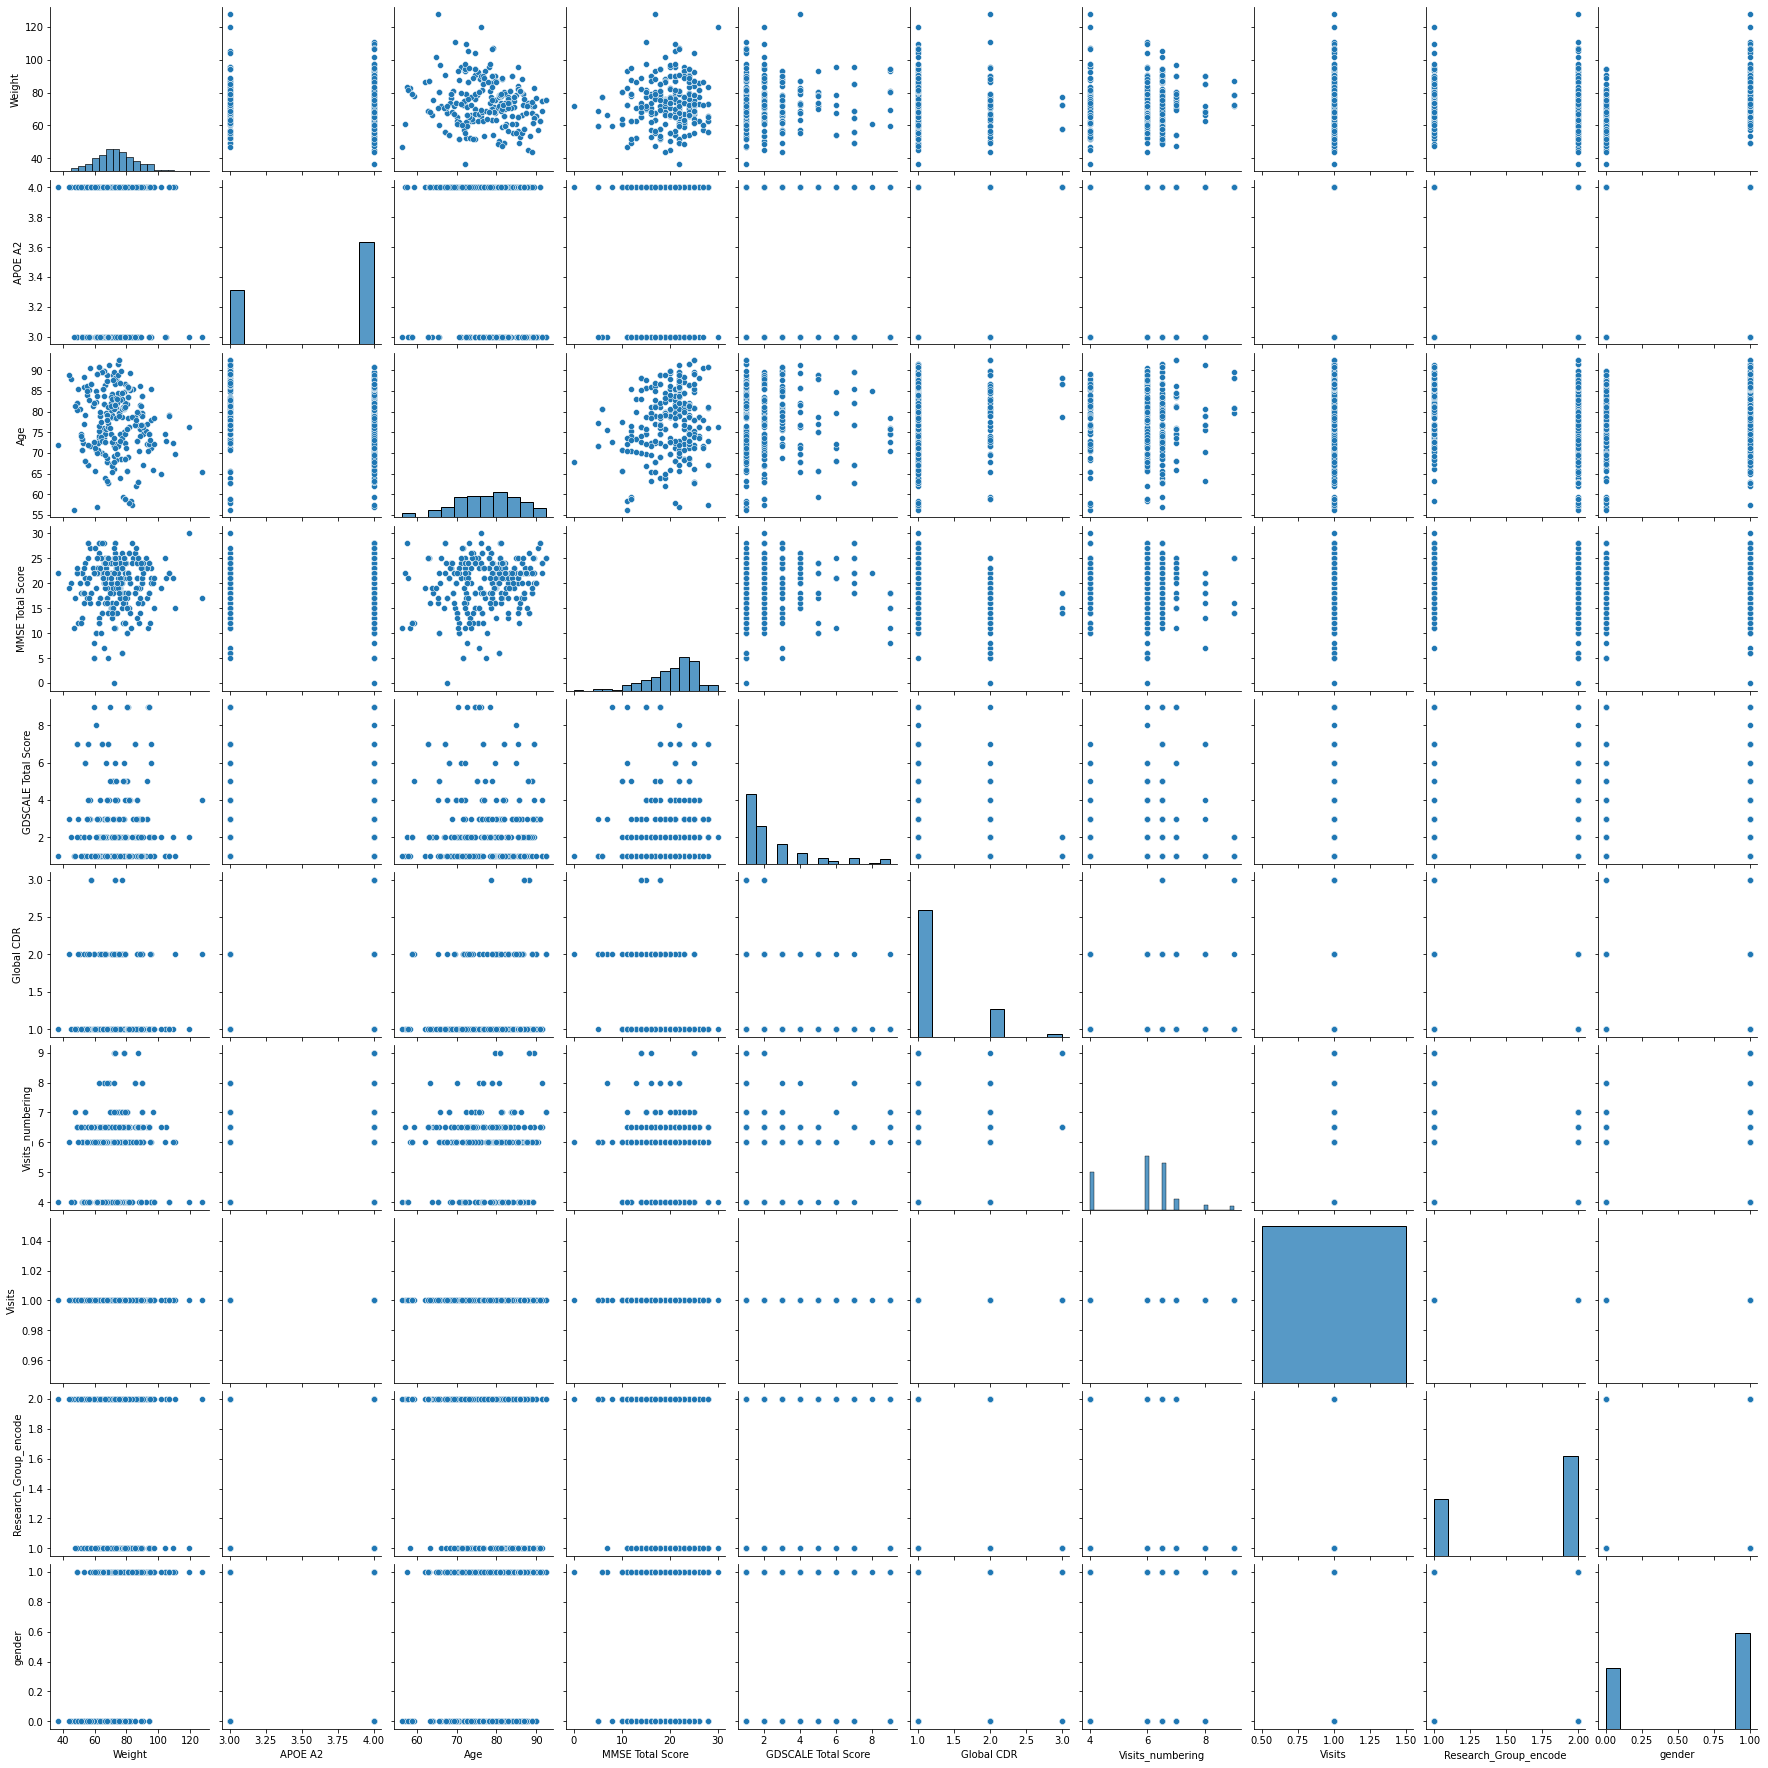

In [209]:
"""HYPOTESIS"""
#It's showing when decrease MMSE (it's probably the patient has AD) is when increase the numbering visit.
#MMSE decrease if your age increase.
sns.pairplot(adni)

In [185]:
gds_vs_sex = adni.pivot_table(columns="GDSCALE Total Score", index="Sex", aggfunc="size")
gds_vs_sex

GDSCALE Total Score   1.0   2.0   3.0   4.0  5.0  6.0  7.0  8.0  9.0
Sex                                                                 
F                    53.0  21.0  19.0   8.0  4.0  4.0  4.0  NaN  6.0
M                    83.0  53.0  20.0  13.0  7.0  2.0  7.0  1.0  3.0

array([[<AxesSubplot:title={'center':'1.0'}>,
        <AxesSubplot:title={'center':'2.0'}>,
        <AxesSubplot:title={'center':'3.0'}>],
       [<AxesSubplot:title={'center':'4.0'}>,
        <AxesSubplot:title={'center':'5.0'}>,
        <AxesSubplot:title={'center':'6.0'}>],
       [<AxesSubplot:title={'center':'7.0'}>,
        <AxesSubplot:title={'center':'8.0'}>,
        <AxesSubplot:title={'center':'9.0'}>]], dtype=object)

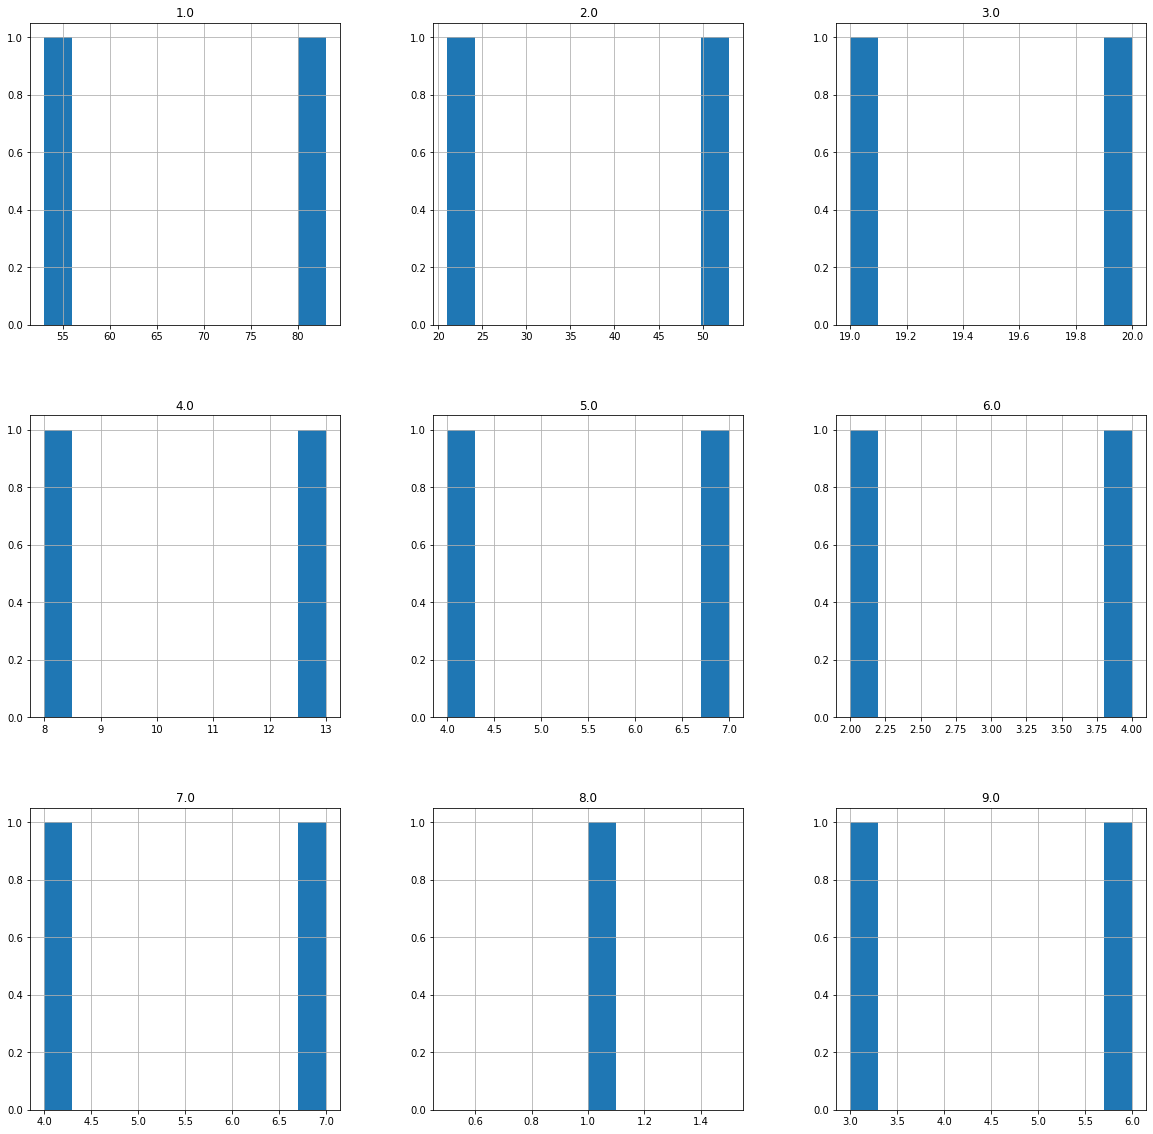

In [199]:
gds_vs_sex.hist(figsize=(20, 20))

<AxesSubplot:ylabel='Frequency'>

<Figure size 1440x1440 with 0 Axes>

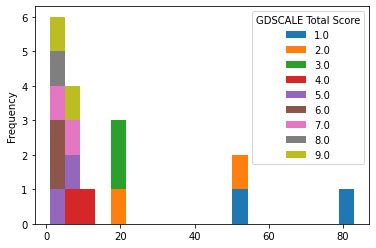

In [190]:
plt.figure(figsize=(20, 20))
gds_vs_sex.plot.hist(stacked=True, bins=20)

<AxesSubplot:xlabel='MMSE Total Score', ylabel='Density'>

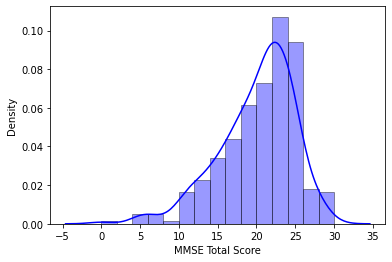

In [207]:
#It's showing which MMSE number has more density. MMSE between 10 and 25 points
sns.distplot(adni['MMSE Total Score'], hist_kws=dict(edgecolor="black", linewidth=1), color='Blue')

<AxesSubplot:xlabel='GDSCALE Total Score'>

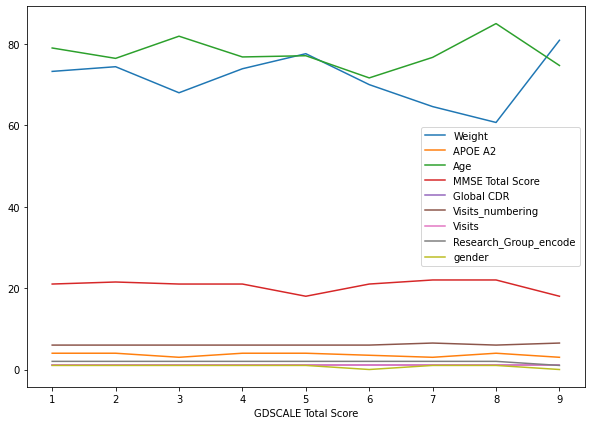

In [208]:
adni.groupby("GDSCALE Total Score").median().plot.line(figsize=(10, 7))

<AxesSubplot:xlabel='Visits_numbering', ylabel='GDSCALE Total Score'>

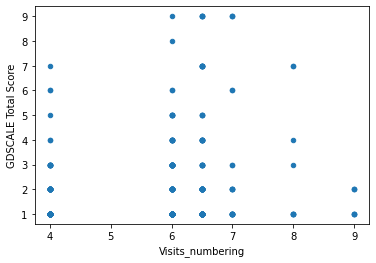

In [159]:
#La mayoría de visitas están concentradas en la 4a, 6a y 7a visita de todo el proceso de AD de un paciente.
adni.plot.scatter(x="Visits_numbering", y="GDSCALE Total Score")

In [174]:
adni.columns

Index(['Subject ID', 'Phase', 'Sex', 'Weight', 'Research Group', 'APOE A2',
       'Visit', 'Study Date', 'Age', 'MMSE Total Score', 'GDSCALE Total Score',
       'Global CDR', 'Description', 'Visits_numbering', 'Visits',
       'Research_Group_encode', 'gender'],
      dtype='object')

<AxesSubplot:xlabel='Visit', ylabel='GDSCALE Total Score'>

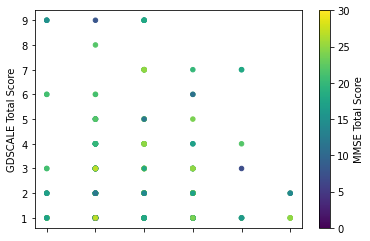

In [179]:
adni.plot.scatter(x="Visit", y="GDSCALE Total Score", c="MMSE Total Score", colormap='viridis')

<AxesSubplot:xlabel='GDSCALE Total Score', ylabel='MMSE Total Score'>

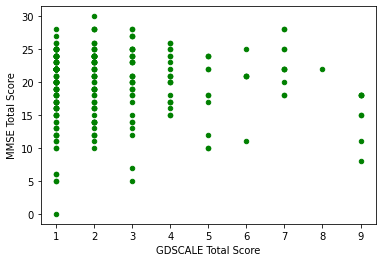

In [181]:
fig, ax = figsize=
adni.plot.scatter(x="GDSCALE Total Score", y="MMSE Total Score", c="green")

## **Building, training and fitting the model**

In [248]:
from sklearn import svm
from sklearn.svm import SVR
# from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.model_selection import RepeatedKFold

from sklearn import metrics
from sklearn.metrics import mean_absolute_error

import warnings
warnings.filterwarnings("ignore")


In [211]:
X = np.array(adni[['Weight', 'APOE A2', 'Age', 'GDSCALE Total Score',
       'Global CDR', 'Visits_numbering', 'Visits', 'Research_Group_encode', 'gender']])
X.shape

(308, 9)

In [212]:
y = np.array(adni['MMSE Total Score'])
y.shape

(308,)

In [213]:
from sklearn.model_selection import train_test_split

### **First it creates a baseline model to train and fit**

In [223]:
#This a sample of the dataset to train and fit because it wants to get a baseline model (orientation)
seed_SAMPLE = 34
X_train_SAMPLE, X_test_SAMPLE, y_train_SAMPLE, y_test_SAMPLE = train_test_split(X, y, test_size=0.80, random_state=seed)

In [224]:
X_train_SAMPLE

array([[ 79.8,   4. ,  71.1,   2. ,   1. ,   4. ,   1. ,   1. ,   1. ],
       [ 73.6,   4. ,  87.8,   5. ,   1. ,   6. ,   1. ,   1. ,   1. ],
       [ 53.5,   4. ,  76.9,   2. ,   1. ,   4. ,   1. ,   1. ,   0. ],
       [ 74.8,   4. ,  71.8,   2. ,   2. ,   4. ,   1. ,   2. ,   0. ],
       [110.7,   4. ,  69.7,   1. ,   2. ,   6. ,   1. ,   2. ,   1. ],
       [ 88.4,   3. ,  75.8,   1. ,   1. ,   6. ,   1. ,   1. ,   1. ],
       [ 67.6,   3. ,  87.5,   1. ,   1. ,   6. ,   1. ,   2. ,   0. ],
       [ 62.6,   4. ,  73.7,   3. ,   1. ,   6. ,   1. ,   2. ,   0. ],
       [ 70.8,   4. ,  65.3,   1. ,   1. ,   4. ,   1. ,   2. ,   1. ],
       [ 61.7,   3. ,  89.2,   3. ,   1. ,   4. ,   1. ,   1. ,   1. ],
       [ 80.3,   4. ,  65.7,   5. ,   1. ,   6. ,   1. ,   2. ,   1. ],
       [ 73.6,   4. ,  87.8,   5. ,   1. ,   6. ,   1. ,   1. ,   1. ],
       [ 67.4,   4. ,  79.7,   6. ,   2. ,   6. ,   1. ,   2. ,   0. ],
       [ 70.4,   3. ,  83.6,   2. ,   1. ,   7. ,   1. ,   1. , 

In [225]:
print(X_train_SAMPLE.shape)
print(y_train_SAMPLE.shape)

(61, 9)
(61,)


In [214]:
#This is split with all data of dataset to train and fit
seed = 23
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=seed)

In [215]:
print(X_train.shape)
print(y_train.shape)

(261, 9)
(261,)


In [244]:
pipe = Pipeline(steps=[('classifier', RandomForestRegressor())])
verbose = True

Poly_params = {
    'classifier': [PolynomialFeatures()],
    'classifier__degree': [2]
    }

knn_R_params = {
    'classifier': [KNeighborsRegressor()],
    'classifier__n_neighbors': [7]
    }

Random_Forest_R_params = {
    'classifier': [RandomForestRegressor()],
    'classifier__n_estimators': [10, 50, 100],
    'classifier__verbose': [verbose],
    'classifier__warm_start': [True]
    }

svr_params = {
    'classifier': [svm.SVR()],
    'classifier__kernel':('linear', 'rbf', 'sigmoid'), 
    'classifier__C':[0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9], 
    'classifier__degree': [2],
    'classifier__coef0': [-10.,-1., 0., 0.1, 0.5, 1, 10, 100],
    'classifier__gamma': ('scale', 'auto'),
    'classifier__verbose': [verbose]
    }

search_space = [
    Poly_params,
    knn_R_params,
    Random_Forest_R_params,
    svr_params
    ]

In [245]:
%%time

cv = RepeatedKFold(n_splits=30, n_repeats=5, random_state=12)
# Create grid search 
clf_SAMPLE = GridSearchCV(estimator=pipe, param_grid=search_space, cv=cv, verbose=verbose, n_jobs=-1)

# Fit grid search
best_model_SAMPLE = clf_SAMPLE.fit(X_train_SAMPLE, y_train_SAMPLE)

# View best model
separator = "\n############################\n"
print(separator)
print("best estimator:", best_model_SAMPLE.best_estimator_.get_params()['classifier'])
print(separator)
print("clf.best_params_", clf_SAMPLE.best_params_)
print(separator)
# Mean cross-validated score of the best_estimator
print("clf.best_score", clf_SAMPLE.best_score_)

Fitting 150 folds for each of 389 candidates, totalling 58350 fits
[LibSVM]
############################

best estimator: SVR(C=0.9, coef0=-10.0, degree=2, gamma='auto', verbose=True)

############################

clf.best_params_ {'classifier': SVR(C=0.9, coef0=-10.0, degree=2, gamma='auto', verbose=True), 'classifier__C': 0.9, 'classifier__coef0': -10.0, 'classifier__degree': 2, 'classifier__gamma': 'auto', 'classifier__kernel': 'rbf', 'classifier__verbose': True}

############################

clf.best_score -5.745357417684781
CPU times: user 38.5 s, sys: 966 ms, total: 39.5 s
Wall time: 6min 30s


In [247]:
%%time
#Now, I need to create the model with GridSearch with all dataset.

cv = RepeatedKFold(n_splits=30, n_repeats=5, random_state=12)
# Create grid search 
clf = GridSearchCV(estimator=pipe, param_grid=search_space, cv=cv, verbose=verbose, n_jobs=-1)

# Fit grid search
best_model = clf.fit(X_train, y_train)

# View best model
separator = "\n############################\n"
print(separator)
print("best estimator:", best_model.best_estimator_.get_params()['classifier'])
print(separator)
print("clf.best_params_", clf.best_params_)
print(separator)
# Mean cross-validated score of the best_estimator
print("clf.best_score", clf.best_score_)

Fitting 150 folds for each of 389 candidates, totalling 58350 fits
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.

############################

best estimator: RandomForestRegressor(verbose=True, warm_start=True)

############################

clf.best_params_ {'classifier': RandomForestRegressor(verbose=True, warm_start=True), 'classifier__n_estimators': 100, 'classifier__verbose': True, 'classifier__warm_start': True}

############################

clf.best_score 0.28840494498320957
CPU times: user 39.7 s, sys: 1.19 s, total: 40.9 s
Wall time: 9min 21s
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.6s finished


In [256]:
y_pred = clf.predict(X_test)
y_pred

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished


array([20.1 , 19.13, 22.16, 23.84, 21.5 , 20.35, 21.85,  6.9 , 22.23,
       19.67, 24.69, 16.11, 21.44, 19.26, 15.87, 21.14, 23.18, 20.15,
       17.98, 13.91, 17.86, 11.5 , 24.98, 21.49, 18.35, 23.54, 19.83,
       21.24, 21.23, 18.02, 10.94, 10.44, 17.86, 17.85, 24.25, 20.24,
       24.04, 13.43, 13.09, 20.53, 23.08, 21.94, 19.88, 21.25, 23.29,
       19.11, 24.2 ])

In [257]:
# It needs to know MAE to know which model is better and it gets a minimun error.
print("clf_best_mae", metrics.mean_absolute_error(y_test, y_pred))
# mae de x_test para saber y_pred con y de la label de test

clf_best_mae 2.3391489361702127


In [234]:
import pickle
#SAVE MODEL
# save the model to disk
filename = 'finished_model_SAMPLE.sav'
pickle.dump(best_model_SAMPLE, open(filename, 'wb'))

## **Predictions**

In [235]:
# Predictions about data sample
y_train_SAMPLE_predict = clf_SAMPLE.predict(X_train_SAMPLE)
y_train_SAMPLE_predict 

array([24., 25., 22., 16., 19., 24., 22., 22., 24., 20., 21., 25., 18.,
       22., 22., 22., 22., 19., 20., 22., 24., 15., 24., 25., 22., 15.,
       24., 21., 24., 22., 22., 22., 27., 22., 24., 22., 22., 24., 24.,
       22., 16., 22., 22., 22., 22., 20., 16., 23., 22., 24., 18., 18.,
       22., 22., 20., 22., 22., 22., 24., 15., 22.])

In [250]:
# Predictions with all data
y_train_predict = clf.predict(X_test)
y_train_predict

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished


array([20.1 , 19.13, 22.16, 23.84, 21.5 , 20.35, 21.85,  6.9 , 22.23,
       19.67, 24.69, 16.11, 21.44, 19.26, 15.87, 21.14, 23.18, 20.15,
       17.98, 13.91, 17.86, 11.5 , 24.98, 21.49, 18.35, 23.54, 19.83,
       21.24, 21.23, 18.02, 10.94, 10.44, 17.86, 17.85, 24.25, 20.24,
       24.04, 13.43, 13.09, 20.53, 23.08, 21.94, 19.88, 21.25, 23.29,
       19.11, 24.2 ])

In [239]:
X_test_SAMPLE

array([[64.2,  4. , 77.5, ...,  1. ,  2. ,  1. ],
       [66.1,  3. , 73.6, ...,  1. ,  1. ,  1. ],
       [67.8,  4. , 67.7, ...,  1. ,  2. ,  1. ],
       ...,
       [78.9,  4. , 68.5, ...,  1. ,  1. ,  1. ],
       [68.6,  3. , 62.8, ...,  1. ,  2. ,  1. ],
       [75.3,  4. , 72.3, ...,  1. ,  1. ,  0. ]])

## **RNN Regression**